In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2

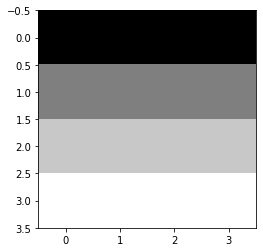

In [2]:
a = np.asarray( [
    [0,0,0,0],
    [127,127,127, 127],
    [200,200,200,200],
    [255, 255, 255, 255]
], dtype='uint8')

plt.imshow(a, cmap='gray')

In [3]:
a.dtype

dtype('uint8')

[[  5   5   5   5]
 [132 132 132 132]
 [205 205 205 205]
 [  4   4   4   4]]


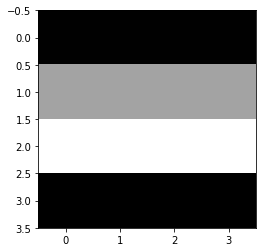

In [4]:
b = a +5
plt.imshow(b,cmap='gray')

# 맨 마지막이 더 어두워진 이유는 overflow가 되어서!
print(b)

--------

(4, 4, 3)
[[[255   0   0]
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[  0 255   0]
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[255 255   0]
  [255 255   0]
  [255 255   0]
  [255 255   0]]]


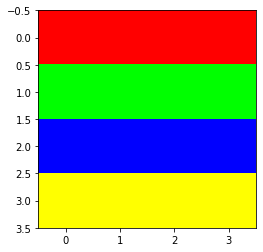

In [5]:
r = np.array( [
    [255,255,255,255],
    [0,0,0,0],
    [0,0,0,0],
    [255, 255, 255, 255]
], dtype='uint8')

g = np.array( [
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0],
    [255, 255, 255, 255]
], dtype='uint8')

b = np.array( [
    [0,0,0,0],
    [0,0,0,0],
    [255,255,255,255],
    [0,0,0,0]
], dtype='uint8')

# dstack에서 d는 depth채널로 붙이라는 소리(판 겹치기)
colors = np.dstack([r,g,b])
print(colors.shape)
print(colors)
plt.imshow(colors)
plt.show()

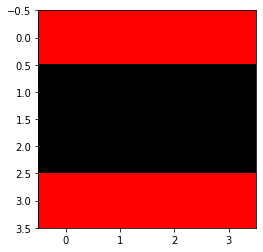

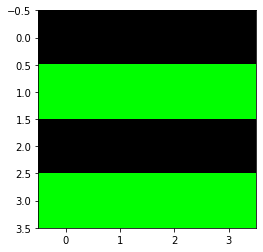

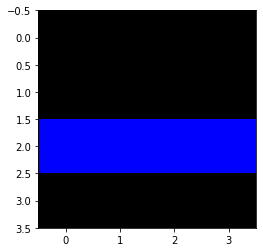

In [6]:
z = np.zeros((4,4), dtype='uint8')

plt.imshow(np.dstack([r,z,z]))
plt.show()

plt.imshow(np.dstack([z,g,z]))
plt.show()

plt.imshow(np.dstack([z,z,b]))
plt.show()

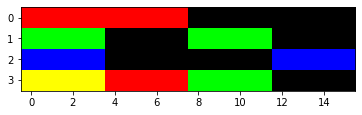

In [7]:
z = np.zeros((4,4), dtype='uint8')

rr = np.dstack([r,z,z])
gg = np.dstack([z,g,z])
bb = np.dstack([z,z,b])

all = np.hstack([np.dstack([r,g,b]), rr, gg, bb])

plt.imshow(all)

<class 'numpy.ndarray'>
(485, 728, 3)


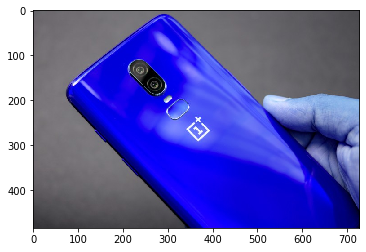

In [8]:
img = cv2.imread("Red.jpg")
print(type(img))
print(img.shape)

plt.imshow(img)

# BGR 순서로 출력해서 색깔이 이상하게 출력된다.
# 그냥 그 당시 제조사에서 그렇게 썼기 때문에,,
# 채널을 바꿔줘야 제대로 된 색이 출력된다. => 자동으로 된 코딩도 있음!

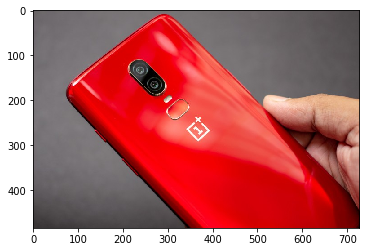

In [9]:
# 원래 데이터에서 각각의 채널을 뽑아내기(*슬라이싱*)
b = img[:,:,0] # 첫번째 채널은 blue 채널
g = img[:,:,1]
r = img[:,:,2]

rgb = np.dstack([r,g,b])
plt.imshow(rgb)

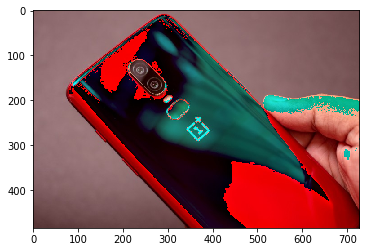

In [10]:
b = img[:,:,0] 
g = img[:,:,1]
r = img[:,:,2] + 30  # 빨간색 셀로판지를 덧댄 것이라 생각하면 편함.
                     # 완전히 색이 변했다면, 오버플로우가 일어난 것.
rgb = np.dstack([r,g,b])
plt.imshow(rgb)

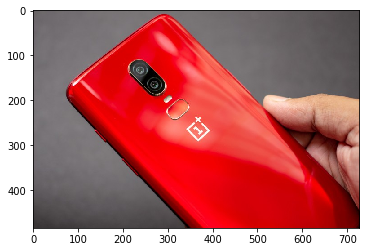

In [11]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# BGR 순서를 RGB로 변환시켜주는 함수
# **처리하는 과정에서 사용하면 안됨!** 마지막에 화면에 보여줄 때만 사용해야한다.
plt.imshow(rgb)

In [12]:
cv2.imwrite("result.jpg",rgb)
# 이미지를 생성하는 함수. r과 b 가 바뀌어서 출력된다.

True

### html 태그로 결과 이미지 출력
<img src = result.jpg width=200>

In [13]:
img = cv2.imread("people.jpg")
# HIS = Hue(색상), Saturation(채도), Intensity(명도)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

result = img.copy() # img 원본이 존재하고, img를 복사해서 사용하는 것
print(result.shape)
print(result.shape[0])

(262, 909, 3)
262


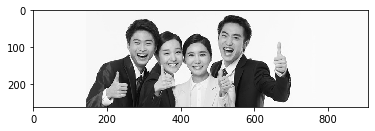

In [14]:
for r in range(h.shape[0]):
    for c in range(h.shape[1]):  # 모든 픽셀을 다 도는 거임
        col = (int(img[r,c,0]) + int(img[r,c,1]) + int(img[r,c,2])) / 3  # 흑백사진으로 바꾸는 방법
        result[r,c,0] = col;
        result[r,c,1] = col;
        result[r,c,2] = col;

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# lower = np.array([0,48,80], dtype='uint8')
# upper = np.array([20,255,255], dtype='uint8')

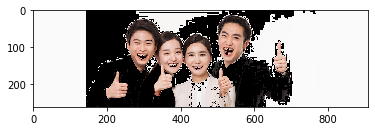

In [15]:
for r in range(h.shape[0]) :
    for c in range(h.shape[1]) :
        if h[r,c] >=0 and h[r,c] <=20 :
            result[r,c,0] = img[r,c,0]
            result[r,c,1] = img[r,c,1]
            result[r,c,2] = img[r,c,2]
        else:
            result[r,c,0] = 0;
            result[r,c,1] = 0;
            result[r,c,2] = 0;
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# lower = np.array([0,48,80], dtype='uint8')
# upper = np.array([20,255, 2550], dtype='uint8')

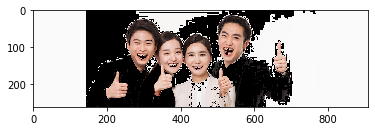

In [16]:
skin = img.copy()
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r,c]>= 0 and h[r,c] <= 20:
            skin[r,c,0] = img[r,c,0]
            skin[r,c,1] = img[r,c,1]
            skin[r,c,2] = img[r,c,2]    
        else:
            skin[r,c,0] = 0
            skin[r,c,1] = 0
            skin[r,c,2] = 0   # 피부색이 아닌건 다 까만색으로
        
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

### 원본/스킨/마스크(피부색)로 표현하기

In [17]:
img = cv2.imread("people.jpg")

skin = img.copy()
for r in range(h.shape[0]):
    for c in range(h.shape[1]):
        if h[r,c]>= 0 and h[r,c] <= 20:
            skin[r,c,0] = img[r,c,0]
            skin[r,c,1] = img[r,c,1]
            skin[r,c,2] = img[r,c,2]    
        else:
            skin[r,c,0] = 0
            skin[r,c,1] = 0
            skin[r,c,2] = 0   # 피부색이 아닌건 다 까만색으로

            
mask = img.copy()
# lower = np.array([0,48,80], dtype='uint8')
# upper = np.array([20,255,255], dtype='uint8')

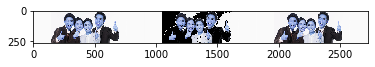

In [18]:
all = np.hstack([img, skin, mask])
plt.imshow(all)

In [19]:
# 파이썬은 포인터가 없지만, 다 포인터라서 없는거임 (?)
a = 8
b = 8 
# 메모리는 int당 4byte씩 필요하므로 8byte가 필요할 것 같지만
# 4byte만 할당됨. '8'로 값이 같기 때문에
# a와 b의 주소값은 같음. 
print(id(a))
print(id(b))

140715865313904
140715865313904


In [20]:
img = cv2.imread("group.jpg")
print(img.shape)
hsv = cv2. cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

(168, 299, 3)


(225, 225, 3)


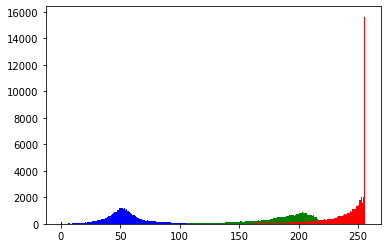

In [21]:
train = cv2.imread("patch.jpg")
print(train.shape)
b,g,r = cv2.split(train)

plt.hist(b.ravel(), 256, [0,256], color='b');
plt.hist(g.ravel(), 256, [0,256], color='g');
plt.hist(r.ravel(), 256, [0,256], color='r');
plt.show()

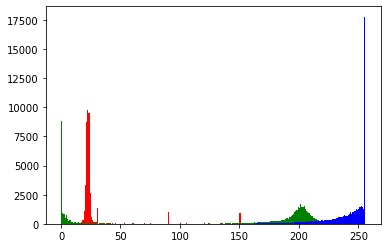

In [22]:
h, s, v = cv2.split(cv2.cvtColor(train,cv2.COLOR_BGR2HSV))
plt.hist(h.ravel(), 256, [0,256], color='r');
plt.hist(s.ravel(), 256, [0,256], color='g');
plt.hist(v.ravel(), 256, [0,256], color='b');

---

(225, 225, 3)


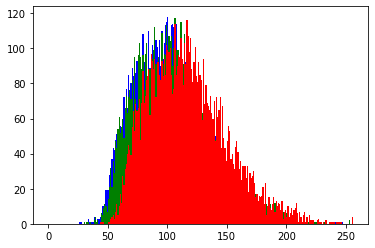

In [23]:
train2 = cv2.imread("patch2.png")
print(train.shape)
b,g,r = cv2.split(train2)

plt.hist(b.ravel(), 256, [0,256], color='b');
plt.hist(g.ravel(), 256, [0,256], color='g');
plt.hist(r.ravel(), 256, [0,256], color='r');
plt.show()

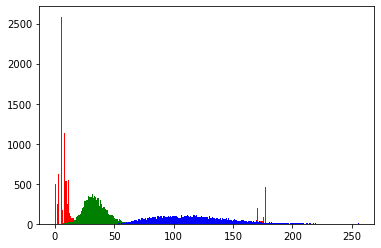

In [24]:
h, s, v = cv2.split(cv2.cvtColor(train2,cv2.COLOR_BGR2HSV))
plt.hist(h.ravel(), 256, [0,256], color='r');
plt.hist(s.ravel(), 256, [0,256], color='g');
plt.hist(v.ravel(), 256, [0,256], color='b');

---

(105, 161, 3)


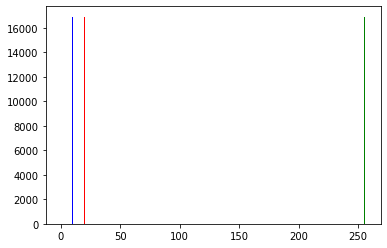

In [25]:
train3 = cv2.imread("patch3.png")
print(train3.shape)
b,g,r = cv2.split(train3)

plt.hist(b.ravel(), 256, [0,256], color='b');
plt.hist(g.ravel(), 256, [0,256], color='g');
plt.hist(r.ravel(), 256, [0,256], color='r');
plt.show()

9 5 19


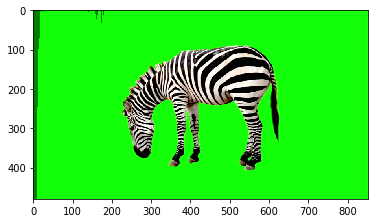

In [26]:
hb = plt.hist(b.ravel(), 256, [0,256], color='b')
hg = plt.hist(h.ravel(), 256, [0,256], color='g')
hr = plt.hist(r.ravel(), 256, [0,256], color='r')

maxb = (np.where( hb[0] == np.max(hb[0])))[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])))[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])))[0][0]
print(maxb, maxg, maxr)

test = cv2.imread("zoo.jpg")
for r in range(test.shape[0]):
    for c in range(test.shape[1]):
        if np.array_equal (test[r,c,:], [maxg, maxb, maxr]):
            test[r, c, :] = [0,0,0]
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))

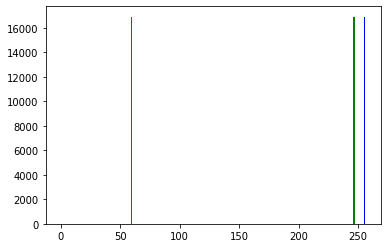

In [27]:
h, s, v = cv2.split(cv2.cvtColor(train3,cv2.COLOR_BGR2HSV))
plt.hist(h.ravel(), 256, [0,256], color='r');
plt.hist(s.ravel(), 256, [0,256], color='g');
plt.hist(v.ravel(), 256, [0,256], color='b');

---

In [28]:
hi = (h.ravel(), 256, [0, 256])
print(hi[0])
print(hi[1])
value = (np.where(hi[0] == np.max(hi[0])))[0][0]
print(value)

[59 59 59 ... 59 59 59]
256
0


In [29]:
train3

array([[[  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19],
        ...,
        [  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19]],

       [[  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19],
        ...,
        [  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19]],

       [[  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19],
        ...,
        [  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19]],

       ...,

       [[  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19],
        ...,
        [  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19]],

       [[  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19],
        ...,
        [  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19]],

       [[  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19],
        ...,
        [  9, 255,  19],
        [  9, 255,  19],
        [  9, 255,  19]]